Number of different cells: 65025
Files differ.


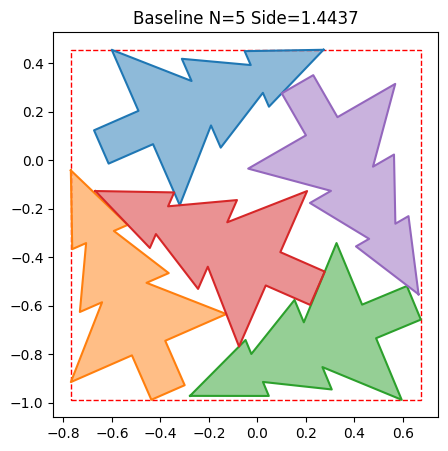

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
from shapely import affinity

# Load submissions
sub_base = pd.read_csv("submission.csv")
sub_sa = pd.read_csv("submission_sa_parallel.csv")

# Check identity
diff = (sub_base != sub_sa).sum().sum()
print(f"Number of different cells: {diff}")

if diff == 0:
    print("Files are identical. SA did not improve anything.")
else:
    print("Files differ.")

# Visualization function
def get_poly(row):
    # Reconstruct polygon from row
    # We need the ChristmasTree class logic or just hardcode the base shape and transform
    # Let's copy the class logic briefly
    scale_factor = 1.0
    trunk_w = 0.15
    trunk_h = 0.2
    base_w = 0.7
    mid_w  = 0.4
    top_w  = 0.25
    tip_y = 0.8
    tier_1_y = 0.5
    tier_2_y = 0.25
    base_y = 0.0
    trunk_bottom_y = -trunk_h

    base_coords = [
        (0.0, tip_y),
        (top_w / 2, tier_1_y),
        (top_w / 4, tier_1_y),
        (mid_w / 2, tier_2_y),
        (mid_w / 4, tier_2_y),
        (base_w / 2, base_y),
        (trunk_w / 2, base_y),
        (trunk_w / 2, trunk_bottom_y),
        (-(trunk_w / 2), trunk_bottom_y),
        (-(trunk_w / 2), base_y),
        (-(base_w / 2), base_y),
        (-(mid_w / 4), tier_2_y),
        (-(mid_w / 2), tier_2_y),
        (-(top_w / 4), tier_1_y),
        (-(top_w / 2), tier_1_y),
    ]
    p = Polygon(base_coords)
    
    x = float(str(row['x']).replace('s', ''))
    y = float(str(row['y']).replace('s', ''))
    deg = float(str(row['deg']).replace('s', ''))
    
    p = affinity.rotate(p, deg, origin=(0,0))
    p = affinity.translate(p, x, y)
    return p

def plot_n(n, df, title):
    df['group_id'] = df['id'].apply(lambda x: int(x.split('_')[0]))
    subset = df[df['group_id'] == n]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    polys = []
    for _, row in subset.iterrows():
        p = get_poly(row)
        polys.append(p)
        x, y = p.exterior.xy
        ax.plot(x, y)
        ax.fill(x, y, alpha=0.5)
    
    # Plot bbox
    from shapely.ops import unary_union
    u = unary_union(polys)
    minx, miny, maxx, maxy = u.bounds
    rect = plt.Rectangle((minx, miny), maxx-minx, maxy-miny, fill=False, color='red', linestyle='--')
    ax.add_patch(rect)
    
    side = max(maxx-minx, maxy-miny)
    ax.set_title(f"{title} N={n} Side={side:.4f}")
    ax.set_aspect('equal')
    plt.savefig(f"viz_{title}_N{n}.png")

# Visualize N=5 from baseline
plot_n(5, sub_base, "Baseline")
